<a href="https://colab.research.google.com/github/Deviprasad21/MACHINE-LEARNING-USING-PYTHON/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy with K=5: 0.74

Confusion Matrix:
[[17  0  2]
 [ 1 15  5]
 [ 1  5  8]]

Classification Report:
              precision    recall  f1-score   support

     class_0       0.89      0.89      0.89        19
     class_1       0.75      0.71      0.73        21
     class_2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



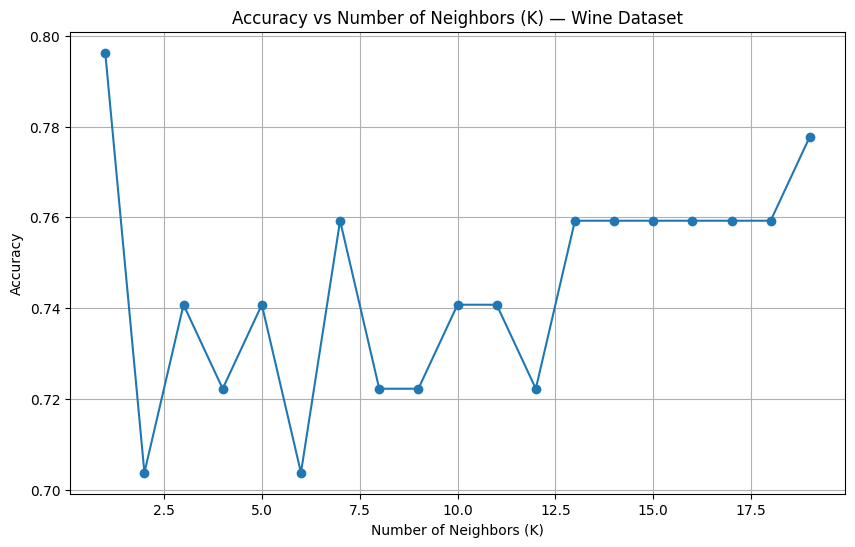

In [1]:
# K-Nearest Neighbors (KNN) Classifier on Wine Dataset

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Wine dataset
wine = datasets.load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize KNN model with K=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with K=5: {accuracy:.2f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))

# Test accuracy for different K values
k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred_k))

# Plot accuracy vs K value
plt.figure(figsize=(10,6))
plt.plot(k_range, scores, marker='o')
plt.title('Accuracy vs Number of Neighbors (K) — Wine Dataset')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
